In [249]:
import numpy as np
import mylib 
from scipy.integrate import odeint
mylib.sail_mass=0.01
mylib.alpha=0
mylib.sigp=1.25
mylib.S=10
mylib.sigb=1.1e-8

In [250]:
print(mylib.sail_mass)
print(mylib.alpha)
print(mylib.sigp)
print(mylib.S)
print(mylib.sigb)

0.01
0
1.25
10
1.1e-08


In [251]:
a1 = 1.0 / 4.0;
b1 = 3.0 / 32.0;
b2 = 9.0 / 32.0;
c1 = 1932.0 / 2197.0;
c2 = -7200.0 / 2197.0;
c3 = 7296.0 / 2197.0;
d1 = 439.0 / 216.0;
d2 = -8.0;
d3 = 3680.0 / 513.0;
d4 = -845.0 / 4104.0;
e1 = -8.0 / 27.0;
e2 = 2.0;
e3 = -3544.0 / 2565.0;
e4 = 1859.0 / 4104.0;
e5 = -11.0 / 40.0;
x1 = 25.0 / 216.0;
x2 = 0.0;
x3 = 1408.0 / 2565.0;
x4 = 2197.0 / 4104.0;
x5 = -1.0 / 5.0;
z1 = 16.0 / 135.0;
z2 = 0.0;
z3 = 6656.0 / 12825.0;
z4 = 28561.0 / 56430.0;
z5 = -9.0 / 50.0;
z6 = 2.0 / 55.0;

In [252]:
var0=[0.,0,0.,0.,0.,1.]

In [253]:
h=1e-1
errmax=1e-1
errmin=1e-2
var=var0
t=0
mytime=[]
myvar=[]
mylib.equation(var0,0)

array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         1.59902812e-05,   0.00000000e+00,   7.58788939e+02])

In [254]:
for ind in range(1000): 
    
    check=0
    vartmp=var
    diff=mylib.equation(vartmp,t)
    k1=h*diff
    vartmp = var + a1*k1

    diff=mylib.equation(vartmp,t)
    k2=h*diff
    vartmp = var + b1*k1 + b2*k2

    diff=mylib.equation(vartmp,t)
    k3=h*diff
    vartmp=var+c1*k1+c2*k2+c3*k3

    diff=mylib.equation(vartmp,t)
    k4=h*diff
    vartmp=var+d1*k1+d2*k2+d3*k3+d4*k4

    diff=mylib.equation(vartmp,t)
    k5=h*diff
    vartmp=var+e1*k1+e2*k2+e3*k3+e4*k4+e5*k5

    diff=mylib.equation(vartmp,t)
    k6=h*diff
    #print(vartmp)
    #print(diff)
    y  = var  + x1*k1  + x2*k2  + x3*k3  + x4*k4  + x5*k5 ;
    z  = var  + z1*k1  + z2*k2  + z3*k3  + z4*k4  + z5*k5  + z6*k6 ;
    #print(y)
    #print(z)
    for i in np.arange(6):
        if var[i]==0 and y[i]==0:
            err=errmin
        elif var[i]<1e3:
            err= np.abs(y[i]  - z [i])
        else:
            err= np.abs(y[i]  - z [i])/np.abs(y[i]) 
        print(err)
        if err>errmax:
            check=1
        elif err<errmin and check!=1:
            check=-1


    if check==1:
        h=h/2
    elif check==-1:
        t=t+h
        var=y
        h=h*2
        print([ind,t,var])
        mytime.append(t)
        myvar.append(var)
    else:
        t=t+h
        var=y
        print([ind,t,var])
        mytime.append(t)
        myvar.append(var)
    if var[5]>1e7:
        break
    if t>2e4:
        break

2.64246851652e-09
0.01
5.98943117325e-12
9.4446066338e-08
0.01
9.7998054116e-11
[0, 0.1, array([  7.07703295e-08,   0.00000000e+00,   3.89394469e+00,
         2.05791146e-06,   0.00000000e+00,   7.68788939e+01])]
3.82158720256e-09
0.01
4.23412416239e-11
1.55504774279e-07
0.01
1.09935172077e-10
[1, 0.30000000000000004, array([  7.72761185e-07,   0.00000000e+00,   3.44455022e+01,
         5.28572687e-06,   0.00000000e+00,   2.28636682e+02])]
1.10435195352e-08
0.01
3.86677356801e-10
3.29795104327e-07
0.01
2.44199327426e-10
[2, 0.7000000000000001, array([  3.89383612e-06,   0.00000000e+00,   1.86603290e+02,
         1.20857595e-05,   0.00000000e+00,   5.32152257e+02])]
3.44410017975e-08
0.01
6.26528162684e-10
6.18154975526e-07
0.01
3.1683157431e-08
[3, 1.5, array([  1.53111007e-05,   0.00000000e+00,   8.55137557e+02,
         1.69323239e-05,   0.00000000e+00,   1.13918341e+03])]


C:\Users\HP\Documents\GitHub\2018UPC\2018UPC\mylib.py:74: RuntimeWarning: invalid value encountered in arccos
  beta1 = np.arccos(beta1/(np.dot(b_xyz,b_xyz)))


1.08334039278e-07
0.01
1.15847342386e-07
nan
0.01
nan
[4, 3.1, array([  5.23334392e-05,   0.00000000e+00,   3.64908086e+03,
         2.68629442e-05,   0.00000000e+00,   2.35324572e+03])]
2.02281740804e-06
0.01
0.0
1.49412649457e-06
0.01
4.86358413065e-11
[5, 6.300000000000001, array([  1.45037585e-04,   0.00000000e+00,   1.50644666e+04,
         5.42552632e-05,   0.00000000e+00,   4.78137040e+03])]
5.90638619187e-06
0.01
2.03686798764e-11
2.24776654768e-06
0.01
3.97720409141e-10
[6, 12.700000000000001, array([  5.45874052e-04,   0.00000000e+00,   6.12052357e+04,
         4.21631367e-05,   0.00000000e+00,   9.63761996e+03])]
2.36255336331e-05
0.01
2.42700458604e-09
4.49553142693e-06
0.01
5.45243152198e-09
[7, 25.5, array([  1.29997335e-03,   0.00000000e+00,   2.46726771e+05,
         1.79789022e-05,   0.00000000e+00,   1.93501209e+04])]
0.000116281121211
0.01
2.03791870109e-08
1.25169363914e-06
0.01
5.30374959797e-08
[8, 51.1, array([  5.94689792e-03,   0.00000000e+00,   9.90729781e+05,

In [255]:
vz6=[]
vx6=[]
c=3e8
for i in range(len(myvar)):
    vz6.append(myvar[i][5]/mylib.sail_mass*np.sqrt(1/(1+(myvar[i][5]**2)/mylib.sail_mass**2/c**2)))
    vx6.append(myvar[i][3]/mylib.sail_mass*np.sqrt(1/(1+(myvar[i][3]**2)/mylib.sail_mass**2/c**2)))
vx6=np.array(vx6)
vz6=np.array(vz6)

In [256]:
mytime6=mytime

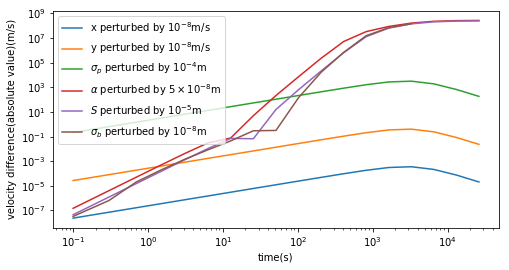

In [261]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,4])
plt.loglog(mytime0,np.abs(vz1[0:18]-vz[0:18]),label='x perturbed by $10^{-8}$m/s')
plt.loglog(mytime0,np.abs(vz2-vz[0:18]),label='y perturbed by $10^{-8}$m/s')
plt.loglog(mytime3,np.abs(vz3-vz[0:18]),label='$\sigma _p$ perturbed by $10^{-4}$m')
plt.loglog(mytime4[0:18],np.abs(vz4[0:18]-vz[0:18]),label='$\\alpha$ perturbed by $5 \\times 10^{-8}$m')
plt.loglog(mytime5[0:18],np.abs(vz5[0:18]-vz[0:18]),label='$S$ perturbed by $ 10^{-5}$m')
plt.loglog(mytime6[0:18],np.abs(vz6[0:18]-vz[0:18]),label='$\sigma_b$ perturbed by $ 10^{-8}$m')
plt.xlabel('time(s)')
plt.ylabel('velocity difference(absolute value)(m/s)')
plt.legend()
plt.savefig('pert.png')
#plt.xlim(0,1000)

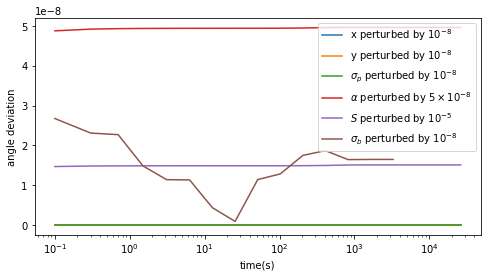

In [278]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,4])
plt.semilogx(mytime0,(vx1/vz1-np.array(vx)/np.array(vz))[0:18],label='x perturbed by $10^{-8}$')
plt.semilogx(mytime0,(vx2/vz2-np.array(vx[0:18])/np.array(vz[0:18]))[0:18],label='y perturbed by $10^{-8}$')
plt.semilogx(mytime3,(vx3/vz3-np.array(vx[0:18])/np.array(vz[0:18]))[0:18],label='$\sigma_p$ perturbed by $10^{-8}$')
plt.semilogx(mytime4[0:18],(vx4[0:18]/vz4[0:18]-np.array(vx[0:18])/np.array(vz[0:18]))[0:18],label='$\\alpha$ perturbed by $5 \\times 10^{-8}$')

plt.semilogx(mytime5[0:18],(vx5[0:18]/vz5[0:18]-np.array(vx[0:18])/np.array(vz[0:18]))[0:18],label='$S$ perturbed by $10^{-5}$')
plt.semilogx(mytime6[0:18],(vx6[0:18]/vz6[0:18]-np.array(vx[0:18])/np.array(vz[0:18]))[0:18],label='$\sigma_b$ perturbed by $10^{-8}$')

plt.xlabel('time(s)')
plt.ylabel('angle deviation')
plt.legend()
plt.savefig('pertang.png')
#plt.xlim(0,1000)

In [275]:
intpvz=interp1d(mytime6[0:15],vz6[0:15],'cubic')

In [276]:
intpvx=interp1d(mytime6[0:15],vx6[0:15],'cubic')

In [277]:
intpvz(819.1)-60860120.670187,intpvx(819.1),intpvx(400)/intpvz(400)

(-15611752.097690716, array(0.7442286205279279), 1.8757424921569835e-08)

In [83]:
intpvz(819.1),intpvx(819.1)

(array(60860120.670187), array(0.0))

In [274]:
vz6,mytime6

(array([  7.68788938e+03,   2.28636681e+04,   5.32152249e+04,
          1.13918333e+05,   2.35324500e+05,   4.78136432e+05,
          9.63757023e+05,   1.93497184e+06,   3.87718795e+06,
          7.76005587e+06,   1.55282465e+07,   3.02259060e+07,
          4.52483686e+07,   4.64375882e+07,   4.64376028e+07,
                     nan,              nan,              nan,
                     nan,              nan,              nan]),
 [0.1,
  0.30000000000000004,
  0.7000000000000001,
  1.5,
  3.1,
  6.300000000000001,
  12.700000000000001,
  25.5,
  51.1,
  102.30000000000001,
  204.70000000000002,
  409.5,
  819.1,
  1638.3000000000002,
  3276.7000000000003,
  6553.5,
  9830.3,
  13107.099999999999,
  16383.899999999998,
  19660.699999999997,
  22937.499999999996])